In [45]:
import numpy as np
import scipy.io
import sklearn
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [46]:
# mat = scipy.io.loadmat('Feature.mat')
mat = scipy.io.loadmat('Feature_all_sig')
mat['Feature_all_sig'].shape

(2480, 33)

In [47]:
CVD     = 1252
non_CVD = 1228
Y = np.zeros((CVD+non_CVD,1))
Y[:CVD] = 1

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(mat['Feature_all_sig'], Y, test_size=0.2)

In [51]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1984, 33) (1984, 1) (496, 33) (496, 1)


In [52]:
Y_train = np.reshape(Y_train, (1984,1))
Y_test  = np.reshape(Y_test,  (496,1))
print(Y_train.shape, Y_test.shape)

(1984, 1) (496, 1)


In [53]:
las = Lasso(alpha=0.1, max_iter=1000)
las.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [54]:
las.coef_
las.intercept_

array([2.75012526])

In [55]:
las.predict(X_test)

array([ 0.21267529,  0.59168357,  0.54333813,  0.4570359 ,  0.45656296,
        0.36174035,  0.37088462,  0.49674741,  0.30403716,  0.47551382,
        0.55091831,  0.71457575,  0.56185956,  0.5853002 ,  0.18903012,
        0.40442119,  0.39585647,  0.25839448,  0.27881006,  0.55395987,
        0.26971098,  0.24397225,  0.95944271,  0.40832939,  0.79980625,
        0.35180118,  0.26737024,  0.28556925,  0.54876336,  0.20596332,
        0.66028702,  0.83888441,  0.72387934,  0.3620848 ,  0.39495517,
        0.96306699,  0.18101766,  0.3778619 ,  0.63261557,  0.70892567,
        0.43791716,  0.26772248,  0.40084808,  0.28150573,  0.53094035,
        0.11014778,  0.33353966,  0.88982887,  0.56521833,  0.38494187,
        0.29932294,  0.32596187,  0.48914951,  0.39553502,  0.44710941,
        0.33520348,  0.38669499,  0.4248002 ,  0.34263065,  0.55054285,
        0.35651889,  0.21800184,  0.39380621,  0.51355205,  0.35627795,
        0.6439154 ,  0.41050784,  0.31033458,  0.60865273,  0.73

In [56]:
las.predict(X_test).shape

(496,)

In [57]:
Y_pred = np.round(las.predict(X_test))
Y_pred = np.reshape(Y_pred, (496,1))

In [58]:
print(Y_pred.shape, Y_test.shape, (Y_pred-Y_test).shape)

(496, 1) (496, 1) (496, 1)


In [59]:
1 - np.sum(abs(Y_pred-Y_test)) / Y_pred.shape[0]

0.7298387096774194

In [44]:
np.sum(abs(Y_pred-Y_test))

147.0

ValueError: shape mismatch: objects cannot be broadcast to a single shape

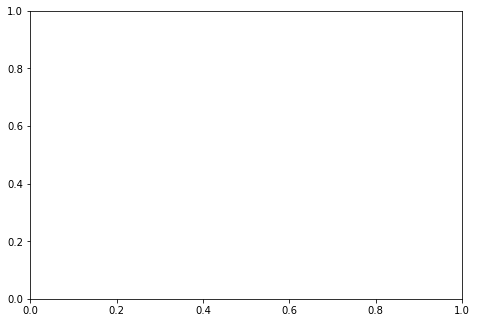

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
x   = np.arange(13)
y   = las.coef_
ax.bar(x, y)
plt.show()

In [46]:
las.coef_

array([ 0.       , -0.0067445, -0.       ,  0.       , -0.       ,
       -0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ])